<div style="border-left: 6px solid #D7263D; padding:20px; border-radius:10px; font-family:Arial, sans-serif; text-align:center; font-size:28px; font-weight:bold;">
  🧪 05 – Evaluation and Error Analysis
</div>

<div style="margin-left:60px; padding:10px; font-size:18px;">
  <p>In this notebook, we perform a complete evaluation of the best model obtained after hyperparameter tuning. We analyze the model's performance on the test set using classification metrics and visualizations. Additionally, we conduct an error analysis to identify patterns in the model's misclassifications.</p>
</div>

<div style="border-left: 6px solid #27ae60; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">📦 Import Libraries and Define Paths</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
  <p style="font-size:18px;">This is the initial block of the rare species image classification project.</p>

  <p>In this section, we perform the following tasks:</p>

  <ul style="line-height: 1.6;">
    <li>📁 <strong>Import libraries</strong> for data manipulation (pandas), file paths (pathlib), and image processing (PIL).</li>
    <li>🖼️ <strong>Apply visual styling</strong> using matplotlib and seaborn to ensure clean and consistent plots.</li>
    <li>📂 <strong>Define the main project directories</strong>, including image folders and the metadata CSV file.</li>
    <li>✅ <strong>Automatic path validation</strong> to ensure all required files and directories exist.</li>
  </ul>

  <p>This setup provides a reliable foundation for safely loading and exploring the dataset.</p>
</div>


In [2]:
from tensorflow.keras.models import load_model
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import classification_report

In [3]:
PROJECT_ROOT = Path().resolve().parent

PROCESSED_DIR = PROJECT_ROOT / 'data' / 'processed'
IMAGE_DIR = PROJECT_ROOT / 'external'
MODELS_DIR = PROJECT_ROOT / 'models'
REPORTS_DIR = PROJECT_ROOT / 'reports'
OUTPUTS_DIR = PROJECT_ROOT / 'output'
LOGS_DIR = OUTPUTS_DIR / 'logs'
PREDICTIONS_DIR = OUTPUTS_DIR / 'predictions'
TRAIN_DIR = PROCESSED_DIR / 'train'
VAL_DIR = PROCESSED_DIR / 'val'
TEST_DIR = PROCESSED_DIR / 'test'


<div style="border-left: 6px solid #27ae60; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">📦 Define Parameters</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
  <p>In this section, we define the core parameters that will guide the training process of the model. These include the input image size, batch size, number of training epochs, and the directory structure of the dataset.</p>
  
  <p>Setting these values early ensures consistency across all steps and allows for easier adjustments when experimenting with different model architectures or datasets.</p>
</div>


In [4]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32


<div style="border-left: 6px solid #233e50; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">📦 MoBileNetV2</h2>
</div>


<div style="border-left: 6px solid #27ae60; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">📂 Load Test Dataset</h2>
</div>

<div style="margin-left:60px; padding:10px; font-family:Arial, sans-serif; font-size:16px;"> 
  <p>In this section, we load the prepared test dataset that will be used to evaluate the final model's performance.</p>
  <p>The test set was kept entirely separate from the training and validation processes to provide an unbiased assessment of the model's generalization ability.</p>
  <p>Predictions and metrics obtained here will form the basis for the evaluation and error analysis stages.</p>
</div>


In [5]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = datagen.flow_from_directory(TEST_DIR, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

model = load_model(MODELS_DIR / 'mobilenetv2_tuned.h5')

Found 1199 images belonging to 202 classes.


<div style="border-left: 6px solid #27ae60; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">📈 Evaluate on Test Set</h2>
</div>

<div style="margin-left:60px; padding:10px; font-family:Arial, sans-serif; font-size:16px;"> 
  <p>The trained model is evaluated on the test set to measure its final performance on unseen data.</p>
  <p>By evaluating on the independent test set, we ensure that the reported metrics truly reflect the model's ability to generalize beyond the training and validation samples.</p>
  <p>We report both the overall loss and the accuracy achieved on the test set.</p>
</div>


In [10]:
loss, acc, auc = model.evaluate(test_generator)
print(f"✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {acc:.2%}")

c:\Users\Tiago Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 27s 659ms/step - accuracy: 0.5770 - auc_1: 0.9401 - loss: 1.8060
✅ Test Loss: 1.9228
✅ Test Accuracy: 56.05%


<div style="border-left: 6px solid #27ae60; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">📥 Load Predictions</h2>
</div>

<div style="margin-left:60px; padding:10px; font-family:Arial, sans-serif; font-size:16px;"> 
  <p>In this step, we load the previously saved predictions generated by the best model after training and hyperparameter tuning.</p>
  <p>The predictions include the filename, the true label, and the predicted label for each image in the test set.</p>
  <p>This data will be used for computing evaluation metrics, analyzing errors, and visualizing model performance.</p>
</div>


In [11]:
predictions_df = pd.read_csv( PREDICTIONS_DIR / 'mobilenetv2_tuned_predictions.csv')
print(tabulate(predictions_df, headers="keys", tablefmt="fancy_grid", showindex=False, floatfmt=".2f"))

╒════════════════════════════════════════════════════════════╤═══════════════════╤═══════════════════╕
│ filename                                                   │ true_label        │ predicted_label   │
╞════════════════════════════════════════════════════════════╪═══════════════════╪═══════════════════╡
│ accipitridae\13600238_1048944_eol-full-size-copy.jpg       │ accipitridae      │ equidae           │
├────────────────────────────────────────────────────────────┼───────────────────┼───────────────────┤
│ accipitridae\14129870_912805_eol-full-size-copy.jpg        │ accipitridae      │ accipitridae      │
├────────────────────────────────────────────────────────────┼───────────────────┼───────────────────┤
│ accipitridae\14177752_45511531_eol-full-size-copy.jpg      │ accipitridae      │ accipitridae      │
├────────────────────────────────────────────────────────────┼───────────────────┼───────────────────┤
│ accipitridae\20757085_914531_eol-full-size-copy.jpg        │ accipitrid

<div style="border-left: 6px solid #27ae60; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">🔵 Confusion Matrix of the Top 20 Families</h2>
</div>

<div style="margin-left:60px; padding:10px; font-family:Arial, sans-serif; font-size:16px;"> 
  <p>In this section, we visualize the confusion matrix focusing exclusively on the top 20 most frequent families in the dataset.</p>

  <p>The confusion matrix allows us to analyze how often images of each family are correctly classified (diagonal values) and where the model tends to make mistakes (off-diagonal values).</p>

  <p>We observe that the model correctly identifies a large number of examples within these top categories, although some confusions still occur, particularly between visually similar families.</p>
</div>



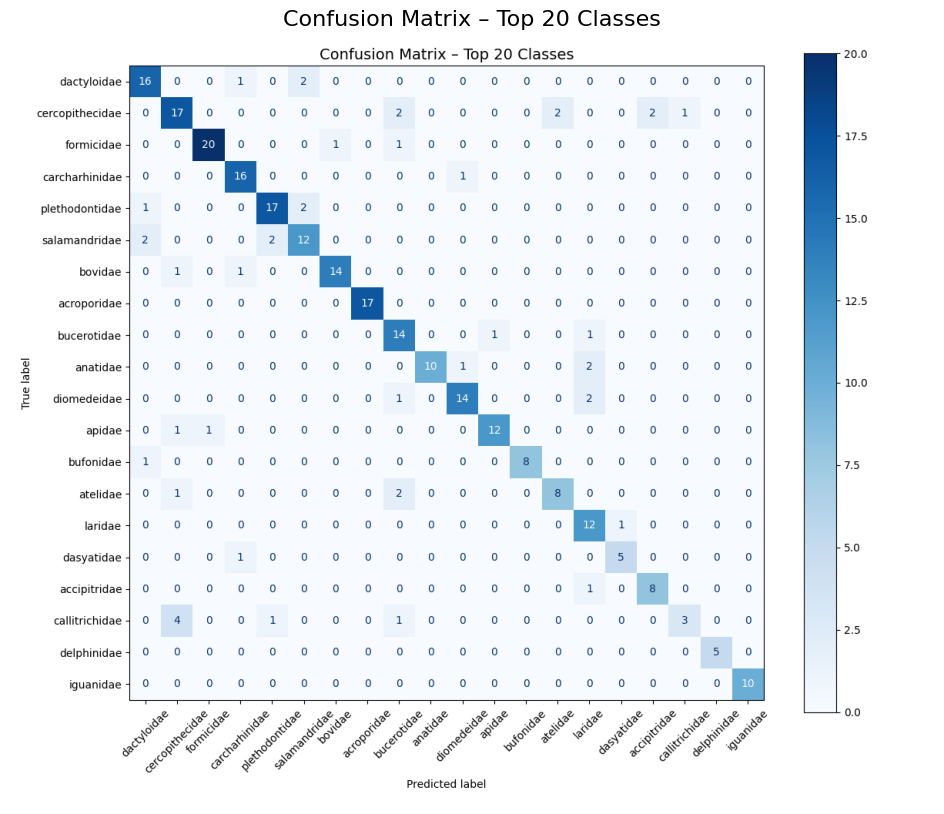

In [12]:
confusion_matrix_img_path = REPORTS_DIR / 'figures' / 'mobilenetv2_tuned_confusion_matrix_top20.png'

img = Image.open(confusion_matrix_img_path)

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title("Confusion Matrix – Top 20 Classes", fontsize=16)
plt.show()

<div style="border-left: 6px solid #27ae60; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">📋 Generate Classification Report</h2>
</div>

<div style="margin-left:60px; padding:10px; font-family:Arial, sans-serif; font-size:16px;"> 
  <p>In this section, we generate a detailed classification report that summarizes the model's performance across all classes.</p>
  
  <p>The report includes three key metrics for each class:</p>
  
  <ul style="line-height:1.6;">
    <li><strong>Precision</strong>: Proportion of correct positive predictions.</li>
    <li><strong>Recall</strong>: Proportion of actual positives correctly identified.</li>
    <li><strong>F1-score</strong>: Harmonic mean of precision and recall, providing a single balanced metric.</li>
  </ul>
  
  <p>By analyzing these metrics, we can better understand which classes the model is handling well and which ones require further attention.</p>
</div>


In [13]:
label_list = sorted(predictions_df['true_label'].unique())
label_to_idx = {label: idx for idx, label in enumerate(label_list)}
idx_to_label = {idx: label for label, idx in label_to_idx.items()}

true_classes = predictions_df['true_label'].map(label_to_idx).values
predicted_classes = predictions_df['predicted_label'].map(label_to_idx).values


print(classification_report(true_classes, predicted_classes, target_names=label_list))

                   precision    recall  f1-score   support

     accipitridae       0.62      0.67      0.64        12
    acipenseridae       0.38      0.33      0.35         9
      acroporidae       0.59      0.81      0.68        21
         agamidae       0.57      0.67      0.62         6
      agariciidae       0.42      0.42      0.42        12
        albulidae       0.00      0.00      0.00         3
      alcedinidae       1.00      0.33      0.50         3
    alligatoridae       0.50      0.33      0.40         3
        alopiidae       0.33      0.33      0.33         6
   ambystomatidae       0.60      0.50      0.55         6
         anatidae       0.83      0.56      0.67        18
         anguidae       0.57      0.67      0.62         6
          aotidae       1.00      0.33      0.50         6
           apidae       0.86      0.80      0.83        15
         ardeidae       0.86      1.00      0.92         6
   arthroleptidae       0.75      1.00      0.86       

c:\Users\Tiago Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tiago Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tiago Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

<div style="border-left: 6px solid #27ae60; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">🔍 Error Analysis Based on Predictions CSV</h2>
</div>

<div style="margin-left:60px; padding:10px; font-family:Arial, sans-serif; font-size:16px;"> 
  <p>In this section, we perform an error analysis based on the previously saved predictions CSV file.</p>

  <p>We identify all cases where the predicted label does not match the true label, enabling us to understand the types of errors the model tends to make.</p>

  <p>By inspecting these mistakes, we can detect systematic patterns, such as frequent confusion between visually similar families, and propose strategies to mitigate them in future training cycles.</p>
</div>


In [14]:
errors_df = predictions_df[predictions_df['true_label'] != predictions_df['predicted_label']]
print(f"Número de erros: {len(errors_df)}")

print(tabulate(errors_df.sample(4), headers="keys", tablefmt="fancy_grid", showindex=False, floatfmt=".2f"))

Número de erros: 527
╒════════════════════════════════════════════════════════╤════════════════╤═══════════════════╕
│ filename                                               │ true_label     │ predicted_label   │
╞════════════════════════════════════════════════════════╪════════════════╪═══════════════════╡
│ stichopodidae\29786668_2984563_eol-full-size-copy.jpg  │ stichopodidae  │ agariciidae       │
├────────────────────────────────────────────────────────┼────────────────┼───────────────────┤
│ callitrichidae\28905196_323886_eol-full-size-copy.jpg  │ callitrichidae │ lemuridae         │
├────────────────────────────────────────────────────────┼────────────────┼───────────────────┤
│ procellariidae\20683878_1049466_eol-full-size-copy.jpg │ procellariidae │ pontoporiidae     │
├────────────────────────────────────────────────────────┼────────────────┼───────────────────┤
│ procellariidae\20683891_1049466_eol-full-size-copy.jpg │ procellariidae │ otariidae         │
╘══════════════════

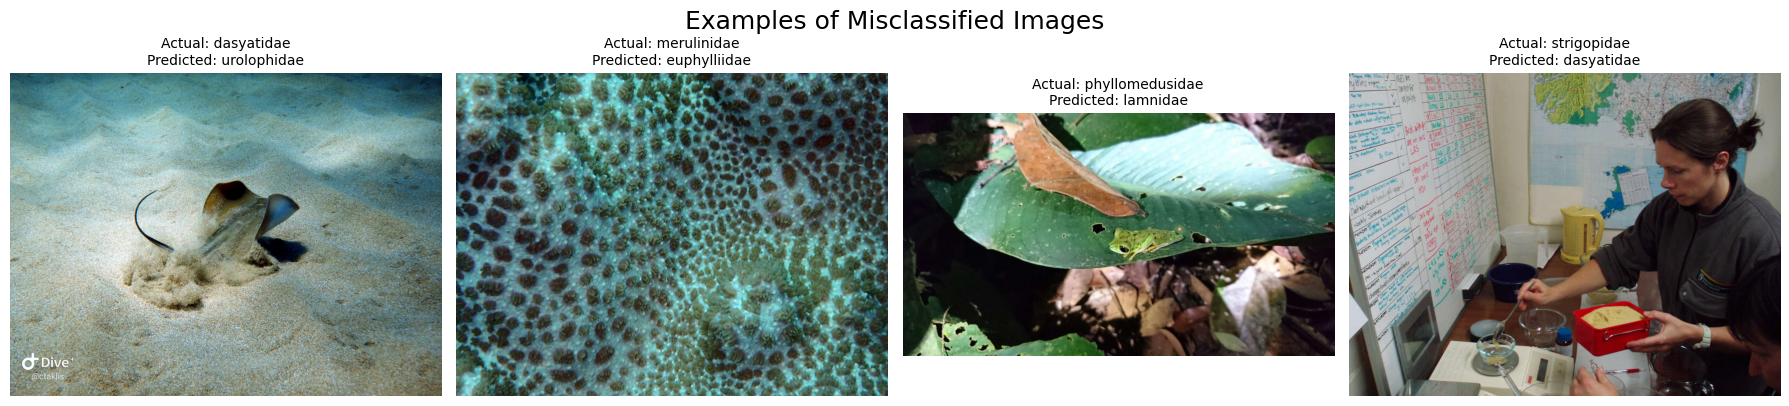

In [15]:
num_errors_to_show = 4

num_errors_to_show = min(num_errors_to_show, len(errors_df))

plt.figure(figsize=(18, 12))

for i, (_, row) in enumerate(errors_df.sample(num_errors_to_show).iterrows()):
    img_path = TEST_DIR / row['filename']
    
    try:
        img = Image.open(img_path)

        plt.subplot(3, 4, i + 1)
        plt.imshow(img)
        plt.title(f"Actual: {row['true_label']}\nPredicted: {row['predicted_label']}", fontsize=10)
        plt.axis('off')

    except Exception as e:
        print(f"Error opening image {img_path}: {e}")

plt.suptitle("Examples of Misclassified Images", fontsize=18)
plt.tight_layout()
plt.show()


<div style="border-left: 6px solid #233e50; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">📦 EfficientNetB0</h2>
</div>


<div style="border-left: 6px solid #27ae60; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">📂 Load Test Dataset</h2>
</div>

<div style="margin-left:60px; padding:10px; font-family:Arial, sans-serif; font-size:16px;"> 
  <p>In this section, we load the prepared test dataset that will be used to evaluate the final model's performance.</p>
  <p>The test set was kept entirely separate from the training and validation processes to provide an unbiased assessment of the model's generalization ability.</p>
  <p>Predictions and metrics obtained here will form the basis for the evaluation and error analysis stages.</p>
</div>


In [6]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = datagen.flow_from_directory(TEST_DIR, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

model = load_model(MODELS_DIR / 'final_solution' / 'efficientnetb0_best.keras')

Found 1199 images belonging to 202 classes.


c:\Users\Tiago Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 440 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<div style="border-left: 6px solid #27ae60; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">📈 Evaluate on Test Set</h2>
</div>

<div style="margin-left:60px; padding:10px; font-family:Arial, sans-serif; font-size:16px;"> 
  <p>The trained model is evaluated on the test set to measure its final performance on unseen data.</p>
  <p>By evaluating on the independent test set, we ensure that the reported metrics truly reflect the model's ability to generalize beyond the training and validation samples.</p>
  <p>We report both the overall loss and the accuracy achieved on the test set.</p>
</div>


In [7]:
loss, acc, auc = model.evaluate(test_generator)
print(f"✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {acc:.2%}")

c:\Users\Tiago Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 705ms/step - AUC: 0.9502 - accuracy: 0.5563 - loss: 1.7844
✅ Test Loss: 1.7697
✅ Test Accuracy: 57.13%


<div style="border-left: 6px solid #27ae60; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">📥 Load Predictions</h2>
</div>

<div style="margin-left:60px; padding:10px; font-family:Arial, sans-serif; font-size:16px;"> 
  <p>In this step, we load the previously saved predictions generated by the best model after training and hyperparameter tuning.</p>
  <p>The predictions include the filename, the true label, and the predicted label for each image in the test set.</p>
  <p>This data will be used for computing evaluation metrics, analyzing errors, and visualizing model performance.</p>
</div>


In [19]:
predictions_df = pd.read_csv( PREDICTIONS_DIR / 'efficientnetb0_best_predictions.csv')
print(tabulate(predictions_df, headers="keys", tablefmt="fancy_grid", showindex=False, floatfmt=".2f"))

╒════════════════════════════════════════════════════════════╤═══════════════════╤═══════════════════╕
│ filename                                                   │ true_label        │ predicted_label   │
╞════════════════════════════════════════════════════════════╪═══════════════════╪═══════════════════╡
│ accipitridae\13600238_1048944_eol-full-size-copy.jpg       │ accipitridae      │ accipitridae      │
├────────────────────────────────────────────────────────────┼───────────────────┼───────────────────┤
│ accipitridae\14129870_912805_eol-full-size-copy.jpg        │ accipitridae      │ accipitridae      │
├────────────────────────────────────────────────────────────┼───────────────────┼───────────────────┤
│ accipitridae\14177752_45511531_eol-full-size-copy.jpg      │ accipitridae      │ spheniscidae      │
├────────────────────────────────────────────────────────────┼───────────────────┼───────────────────┤
│ accipitridae\20757085_914531_eol-full-size-copy.jpg        │ accipitrid

<div style="border-left: 6px solid #27ae60; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">🔵 Confusion Matrix of the Top 20 Families</h2>
</div>

<div style="margin-left:60px; padding:10px; font-family:Arial, sans-serif; font-size:16px;"> 
  <p>In this section, we visualize the confusion matrix focusing exclusively on the top 20 most frequent families in the dataset.</p>

  <p>The confusion matrix allows us to analyze how often images of each family are correctly classified (diagonal values) and where the model tends to make mistakes (off-diagonal values).</p>

  <p>We observe that the model correctly identifies a large number of examples within these top categories, although some confusions still occur, particularly between visually similar families.</p>
</div>



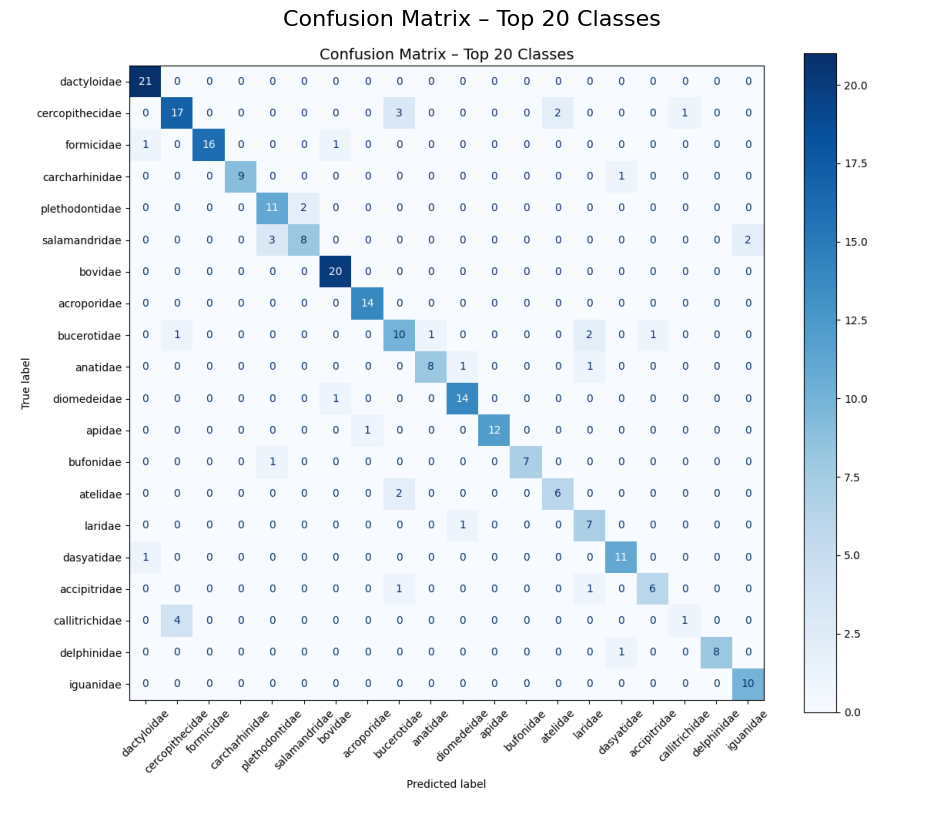

In [20]:
confusion_matrix_img_path = REPORTS_DIR / 'figures' / 'efficientnetb0_best_confusion_matrix_top20.png'

img = Image.open(confusion_matrix_img_path)

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.title("Confusion Matrix – Top 20 Classes", fontsize=16)
plt.show()

<div style="border-left: 6px solid #27ae60; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">📋 Generate Classification Report</h2>
</div>

<div style="margin-left:60px; padding:10px; font-family:Arial, sans-serif; font-size:16px;"> 
  <p>In this section, we generate a detailed classification report that summarizes the model's performance across all classes.</p>
  
  <p>The report includes three key metrics for each class:</p>
  
  <ul style="line-height:1.6;">
    <li><strong>Precision</strong>: Proportion of correct positive predictions.</li>
    <li><strong>Recall</strong>: Proportion of actual positives correctly identified.</li>
    <li><strong>F1-score</strong>: Harmonic mean of precision and recall, providing a single balanced metric.</li>
  </ul>
  
  <p>By analyzing these metrics, we can better understand which classes the model is handling well and which ones require further attention.</p>
</div>


In [21]:
label_list = sorted(predictions_df['true_label'].unique())
label_to_idx = {label: idx for idx, label in enumerate(label_list)}
idx_to_label = {idx: label for label, idx in label_to_idx.items()}

true_classes = predictions_df['true_label'].map(label_to_idx).values
predicted_classes = predictions_df['predicted_label'].map(label_to_idx).values


print(classification_report(true_classes, predicted_classes, target_names=label_list))

                   precision    recall  f1-score   support

     accipitridae       0.60      0.50      0.55        12
    acipenseridae       0.30      0.33      0.32         9
      acroporidae       0.93      0.67      0.78        21
         agamidae       0.50      0.33      0.40         6
      agariciidae       0.50      0.25      0.33        12
        albulidae       0.00      0.00      0.00         3
      alcedinidae       0.50      0.67      0.57         3
    alligatoridae       1.00      0.67      0.80         3
        alopiidae       0.43      0.50      0.46         6
   ambystomatidae       0.33      0.67      0.44         6
         anatidae       0.67      0.44      0.53        18
         anguidae       0.56      0.83      0.67         6
          aotidae       0.33      0.17      0.22         6
           apidae       1.00      0.80      0.89        15
         ardeidae       0.50      0.50      0.50         6
   arthroleptidae       0.75      1.00      0.86       

c:\Users\Tiago Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tiago Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tiago Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

<div style="border-left: 6px solid #27ae60; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">🔍 Error Analysis Based on Predictions CSV</h2>
</div>

<div style="margin-left:60px; padding:10px; font-family:Arial, sans-serif; font-size:16px;"> 
  <p>In this section, we perform an error analysis based on the previously saved predictions CSV file.</p>

  <p>We identify all cases where the predicted label does not match the true label, enabling us to understand the types of errors the model tends to make.</p>

  <p>By inspecting these mistakes, we can detect systematic patterns, such as frequent confusion between visually similar families, and propose strategies to mitigate them in future training cycles.</p>
</div>


In [22]:
errors_df = predictions_df[predictions_df['true_label'] != predictions_df['predicted_label']]
print(f"Número de erros: {len(errors_df)}")

print(tabulate(errors_df.sample(4), headers="keys", tablefmt="fancy_grid", showindex=False, floatfmt=".2f"))

Número de erros: 513
╒══════════════════════════════════════════════════════════╤═════════════════╤═══════════════════╕
│ filename                                                 │ true_label      │ predicted_label   │
╞══════════════════════════════════════════════════════════╪═════════════════╪═══════════════════╡
│ alopiidae\29907329_46559744_eol-full-size-copy.jpg       │ alopiidae       │ carcharhinidae    │
├──────────────────────────────────────────────────────────┼─────────────────┼───────────────────┤
│ phyllomedusidae\21181833_46394217_eol-full-size-copy.jpg │ phyllomedusidae │ rhacophoridae     │
├──────────────────────────────────────────────────────────┼─────────────────┼───────────────────┤
│ pocilloporidae\2747742_45275970_eol-full-size-copy.jpg   │ pocilloporidae  │ dendrophylliidae  │
├──────────────────────────────────────────────────────────┼─────────────────┼───────────────────┤
│ phrynosomatidae\29839853_1055105_eol-full-size-copy.jpg  │ phrynosomatidae │ unionidae

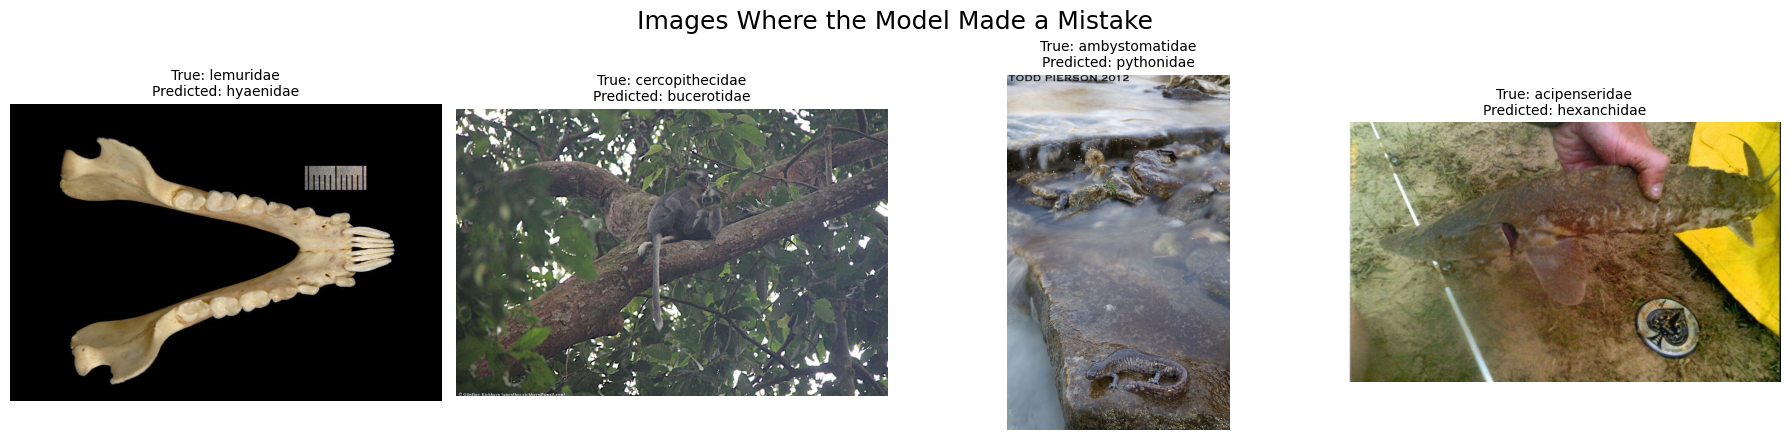

In [23]:
num_errors_to_show = 4

num_errors_to_show = min(num_errors_to_show, len(errors_df))

plt.figure(figsize=(18, 12))

for i, (_, row) in enumerate(errors_df.sample(num_errors_to_show).iterrows()):
    img_path = TEST_DIR / row['filename']
    
    try:
        img = Image.open(img_path)

        plt.subplot(3, 4, i + 1)
        plt.imshow(img)
        plt.title(f"True: {row['true_label']}\nPredicted: {row['predicted_label']}", fontsize=10)
        plt.axis('off')

    except Exception as e:
        print(f"Error opening image {img_path}: {e}")

plt.suptitle("Images Where the Model Made a Mistake", fontsize=18)
plt.tight_layout()
plt.show()
